# Kobe Bryant Shots


(This is for a kaggle competition 'Kobe Bryant Shot Selection' (https://www.kaggle.com/c/kobe-bryant-shot-selection))

In [239]:
import numpy as np 
import pandas as pd 

import seaborn as sns
sns.set(color_codes=True)

import matplotlib.pyplot as plt
%matplotlib inline

In [240]:
# import data
filename= "data.csv"
raw = pd.read_csv(filename)

## Dropping nans
We are gonna make a variable without `nan` for our exploratory analysis. 

In [241]:
data = raw[pd.notnull(raw['shot_made_flag'])]

## Let's go!

## Shot distance

Mean shot distance increase from 12 ft. to almost 18 ft. in the last season!

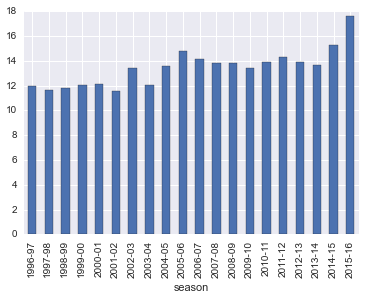

In [242]:
data.pivot_table('shot_distance', 'season', aggfunc='mean').plot(kind='bar')

## What about shots accuracy?

In [243]:
seasons = data.season.unique()
percent_stat = []
for season in seasons:
    perc = round(float(data[(data['season']==season) 
                      & (data['shot_made_flag']==1)].shape[0]) / data[(data['season']==season)].shape[0]*100, 2)
    
    perc2 = round(float(data[(data['season']==season) & (data['shot_type']=='2PT Field Goal')
                      & (data['shot_made_flag']==1)].shape[0]) / data[(data['season']==season) & 
                                                                      (data['shot_type']=='2PT Field Goal')].shape[0]*100, 2)
    
    perc3 = round(float(data[(data['season']==season) & (data['shot_type']=='3PT Field Goal')
                      & (data['shot_made_flag']==1)].shape[0]) / data[(data['season']==season) & 
                                                                      (data['shot_type']=='3PT Field Goal')].shape[0]*100, 2)
    percent_stat.append((season, perc, perc2, perc3))
percent_stat_df = pd.DataFrame(percent_stat)
percent_stat_df.columns = ['season', 'percent', 'percent2', 'percent3']

### all shots accuracy

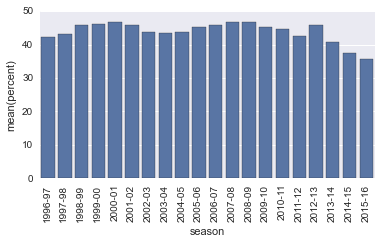

In [244]:
def plot_sp(t='percent'):
    plt.figure(figsize=(6,3))
    g = sns.barplot(percent_stat_df.season.sort_values(), percent_stat_df[t], color="b")
    for item in g.get_xticklabels():
        item.set_rotation(90)

plot_sp()

### 2PT Field Goal accuracy

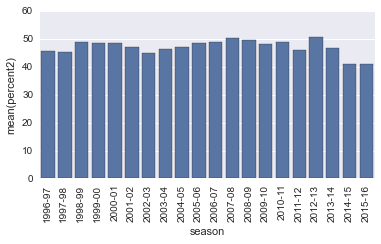

In [245]:
plot_sp('percent2')

### 3PT Field Goal accuracy

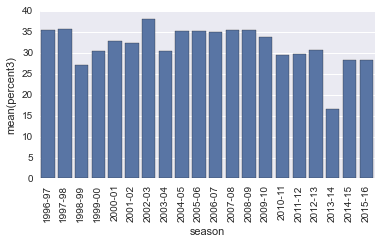

In [246]:
plot_sp('percent3')

### Correlation between shot distance and accuracy

Thank's Cap!

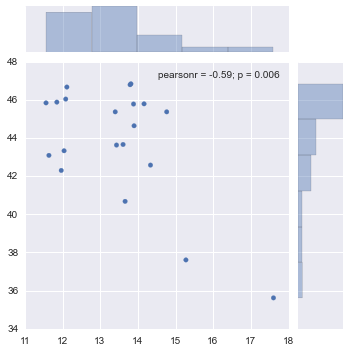

In [247]:
shot_distance_df = pd.DataFrame(data.pivot_table('shot_distance', 'season', aggfunc='mean'))
sdv = shot_distance_df['shot_distance'].values
psv = percent_stat_df.sort_values('season')['percent'].values

sns.jointplot(x=sdv, y=psv, size=5)

## Shot accuracy by period during career

In [248]:
def percent_by_period(playoff=False, stype='2PT Field Goal'):
    plt.figure(figsize=(8,5))
    for period in [1, 2, 3, 4]:
        percent_stat = []
        for season in sorted(seasons):
            add_cond = data['playoffs']==0
            if playoff:
                add_cond = data['playoffs']==1
            suc = float(data[(data['season']==season) & 
                             (add_cond) &
                             (data['period']==period) & 
                             (data['shot_type']==stype) & 
                             (data['shot_made_flag']==1)].shape[0])
            all_s = data[(data['season']==season) & 
                         (add_cond) &
                         (data['period']==period) &
                         (data['shot_type']==stype)].shape[0]
            if all_s > 0:
                perc2 = round(suc*100/all_s , 2)
            else:
                perc2 = 0
            percent_stat.append(perc2)

        plt.plot(range(len(seasons)), percent_stat, label='period {}'.format(period))
        plt.xticks(range(len(seasons)), sorted(seasons), rotation='vertical')
    plt.legend(loc=0, fontsize='small')
    plt.title(stype)
    plt.show()

### In regular season

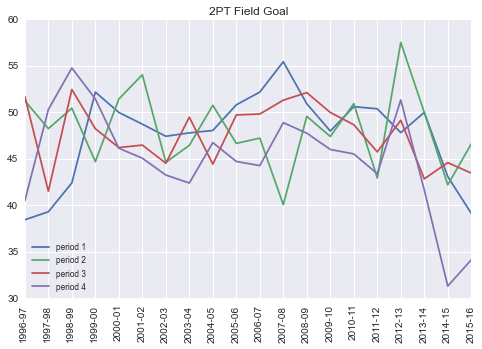

In [249]:
percent_by_period()

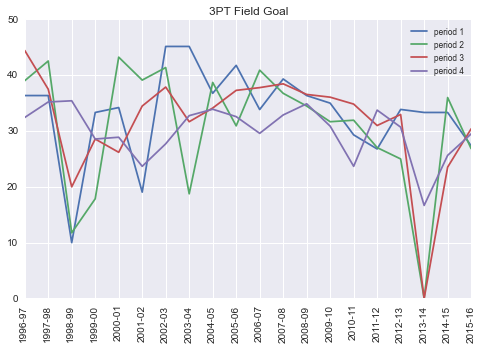

In [250]:
percent_by_period(stype='3PT Field Goal')

In 2000-2004 Kobe gave up on game in 4 quarter. 

Fuck it Dude, let's go bowling.

### In playoffs

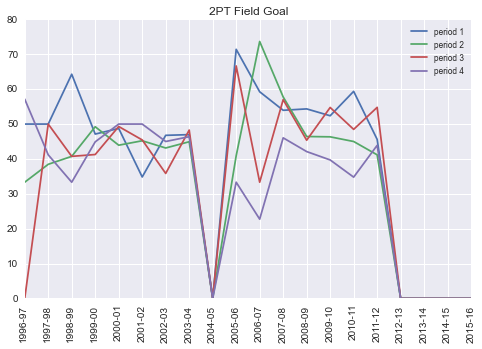

In [251]:
percent_by_period(True)

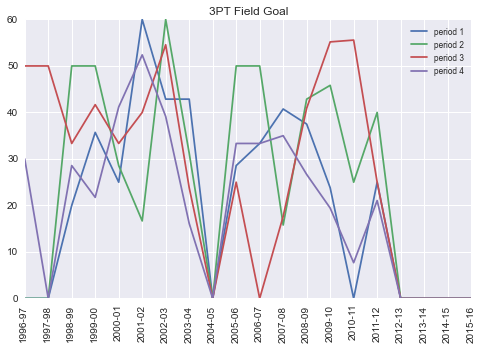

In [252]:
percent_by_period(True, stype='3PT Field Goal')

In 2000-2004 Kobe was more effective in the 4 quarter! 

### Not bad. Let's see him at overtime.

In [253]:
def percent_stat_in_overtime():
    percent_stat = []
    for season in sorted(seasons):
        for stype in ['2PT Field Goal', '3PT Field Goal']:
            suc = float(data[(data['season']==season) & 
                             (data['period']>4) & 
                             (data['shot_type']==stype) & 
                             (data['shot_made_flag']==1)].shape[0])
            all_s = data[(data['season']==season) & 
                         (data['period']>4) &
                         (data['shot_type']==stype)].shape[0]
            if all_s > 0:
                perc2 = round(suc*100/all_s , 2)
            else:
                perc2 = 0
            percent_stat.append((season, perc2, stype))
    stat_df = pd.DataFrame(percent_stat)
    stat_df.columns = ['season', 'percent', 'type']
    g = sns.factorplot(x="season", y="percent", hue="type", data=stat_df,
                   size=5, aspect=8.0/5, kind="bar", palette="muted")
    g.despine(left=True)
    g.set_ylabels("accuracy")
    g.set_xticklabels(rotation=90)

### Accuracy in overtime

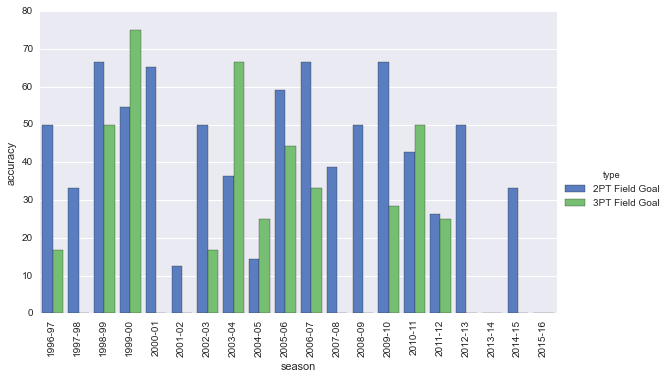

In [254]:
percent_stat_in_overtime()

In the best seasons Kobe was "Mr. Clutch".

## By action type

In [255]:
action_type_stat = []
for t in data.action_type.unique():
    _s = data[(data['action_type']==t) & (data['shot_made_flag']==1)].shape[0]
    _all = data[data['action_type']==t].shape[0]
    acc = round(float(_s)*100/_all, 2)
    action_type_stat.append((t, acc))
action_type_stat_df = pd.DataFrame(action_type_stat)
action_type_stat_df.columns = ['action_type', 'accuracy']

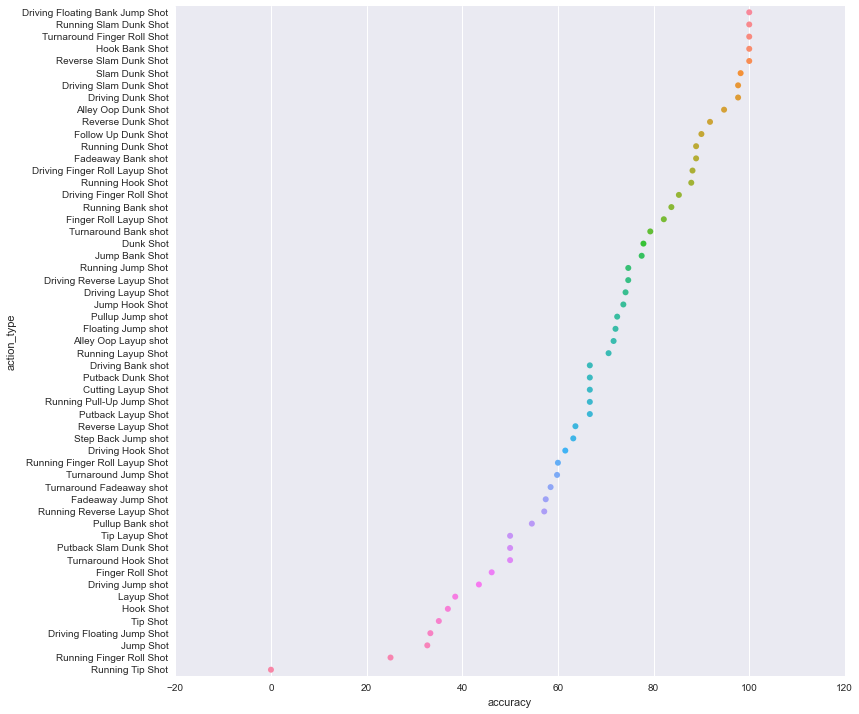

In [256]:
plt.figure(figsize=(12,12))
g = sns.stripplot(y="action_type", x="accuracy",
                  data=action_type_stat_df.sort_values('accuracy', ascending=False), size=6)

## Shot areas

In [257]:
# time to add basketball court lines for context
from matplotlib.patches import Circle, Rectangle, Arc

def draw_court(ax=None, color='black', lw=2, outer_lines=False):
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()

    # Create the various parts of an NBA basketball court

    # Create the basketball hoop
    # Diameter of a hoop is 18" so it has a radius of 9", which is a value
    # 7.5 in our coordinate system
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)

    # Create backboard
    backboard = Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)

    # The paint
    # Create the outer box 0f the paint, width=16ft, height=19ft
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
                          fill=False)
    # Create the inner box of the paint, widt=12ft, height=19ft
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,
                          fill=False)

    # Create free throw top arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed')
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color=color)

    # Three point line
    # Create the side 3pt lines, they are 14ft long before they begin to arc
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw,
                               color=color)
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    # I just played around with the theta values until they lined up with the 
    # threes
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw,
                    color=color)

    # Center Court
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
                           linewidth=lw, color=color)

    # List of the court elements to be plotted onto the axes
    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a,
                      corner_three_b, three_arc, center_outer_arc,
                      center_inner_arc]

    if outer_lines:
        # Draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    return ax

### Shot accuracy by area

In [258]:
def plot_court_stat(t):
    sza_stat = []
    for sza in data[t].unique():
        s = float(data[(data[t]==sza) & (data['shot_made_flag']==1)].shape[0])
        _all = data[data[t]==sza].shape[0]
        sza_stat.append((sza, round(s*100/_all, 2)))

    sza_stat_df = pd.DataFrame(sza_stat)
    sza_stat_df.columns = [t, 'accuracy']
    m_stat = pd.merge(data, sza_stat_df, on=t, how='inner')

    sdata = m_stat[m_stat['shot_made_flag']==1]

    plt.figure(figsize=(12,11))
    fg = sns.FacetGrid(data=sdata, hue='accuracy', size=10)
    fg.map(plt.scatter, 'loc_x', 'loc_y').add_legend()
    draw_court(outer_lines=True)

    # shots
    plt.ylim(-100,500)
    plt.xlim(300,-300)
    plt.show()

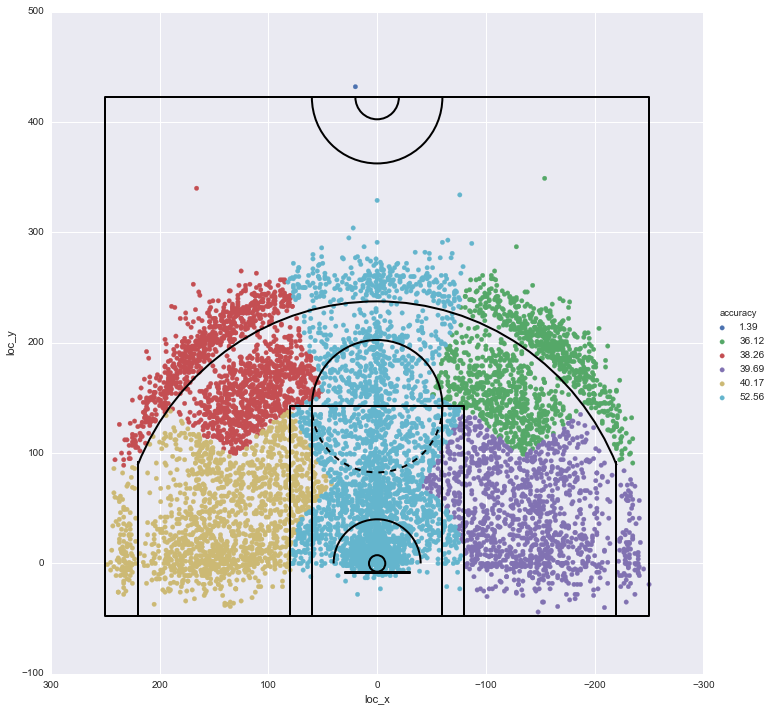

In [259]:
plot_court_stat('shot_zone_area')

### Shot accuracy by zone

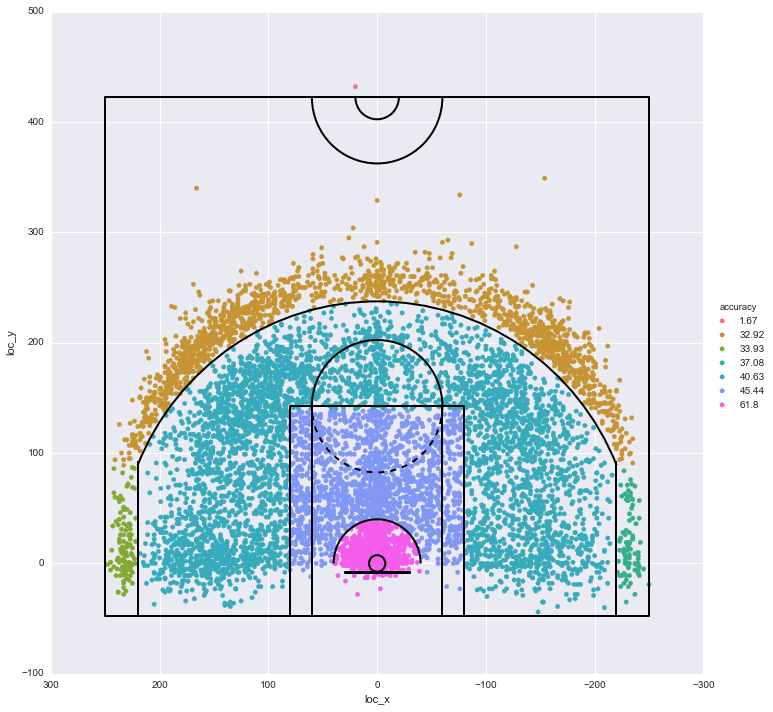

In [260]:
plot_court_stat('shot_zone_basic')

### Shot accuracy by zone range

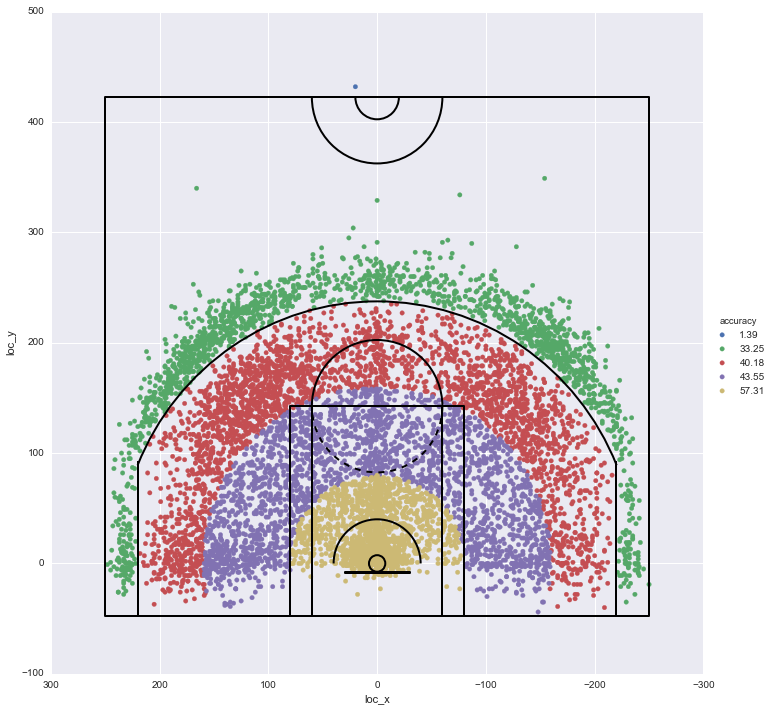

In [261]:
plot_court_stat('shot_zone_range')